<a id='plan'></a>
# Plan

### Learn python 
1. [Ressources](#ressources)


### Introduction
1. [Python keywords](#keywords)
2. [Operators](#operators)
3. [Built-in functions](#functions)
4. [Python standard Library](#standard)
5. [Python packages](#packages)
6. [Étapes du développement d'un projet](#project)
7. [Working with time](#time)

### Jupyter notebook
1. [Référence](#jupyter)

<a id='ressources'></a>
# Learn python ressources
1. https://quantecon.org/lectures/index....
2. https://automatetheboringstuff.com/
3. https://pbpython.com/
4. https://hackersandslackers.com/
5. https://www.youtube.com/c/Coreyms
6. https://www.youtube.com/user/dataschool
7. https://www.pythoncheatsheet.org/ 
8. https://wiki.python.org/moin/

[Retour au plan](#plan)

<a id='keywords'></a>
# Python keywords
**36** keywords and, as, if, else, elif, raise, True, False, None, ...
## Pour en savoir plus
- [Real python](https://realpython.com/python-keywords/#:~:text=Python%20Keywords%20and%20Their%20Usage%201%20Value%20Keywords%3A,Keywords%3A%20import%2C%20from%2C%20as.%20...%20More%20items...%20)

[Retour au plan](#plan)

In [3]:
# Standard Library import
import keyword

for i, key_word in enumerate(keyword.kwlist):
    print(f'{str(i).rjust(10)}: {key_word}')

         0: False
         1: None
         2: True
         3: __peg_parser__
         4: and
         5: as
         6: assert
         7: async
         8: await
         9: break
        10: class
        11: continue
        12: def
        13: del
        14: elif
        15: else
        16: except
        17: finally
        18: for
        19: from
        20: global
        21: if
        22: import
        23: in
        24: is
        25: lambda
        26: nonlocal
        27: not
        28: or
        29: pass
        30: raise
        31: return
        32: try
        33: while
        34: with
        35: yield


In [5]:
list_my_keywords = ["if","None","trarmiz","True","TRUE","list","max","not","or","and"]

for my_keyword in list_my_keywords:
    if keyword.iskeyword(my_keyword):
        print(f'YES, "{my_keyword}" is a keyword.')
    else:
        print(f'NO , "{my_keyword}" is not a keyword.')

YES, "if" is a keyword.
YES, "None" is a keyword.
NO , "trarmiz" is not a keyword.
YES, "True" is a keyword.
NO , "TRUE" is not a keyword.
NO , "list" is not a keyword.
NO , "max" is not a keyword.
YES, "not" is a keyword.
YES, "or" is a keyword.
YES, "and" is a keyword.


<a id='operators'></a>
## Operators
1. Arithmetic Operators +, - , \*, /, %, //, \**
2. Comparison Operators ==, !=, <, >, <=, >=
3. Logical Operators not, or, and
4. Bitwise Operators &, |, ~, ^, >>, <<
5. Slicing operator []


[Retour au plan](#plan)

In [37]:
'''Division modulo and division remainder
'''
x = 9
mod = 4
print(f'the remainder of {x} / {mod} = {x % 4}')
print(f'{x} mod {mod} = {x // 4}')

the remainder of 9 / 4 = 1
9 mod 4 = 2


In [7]:
'''
Exemples d'opérateurs booléens et de comparaison.
falsy and truthy objects
'''
x = 0
y = 1
z = []
print(x < 10 or callable(x))
print(bool([])) # truthy or falsy
print(bool([]),bool(''),bool({}),bool(0))
print(f'number of trues {True + True}')
if not x:
    print('x is falsy !!!')
if y:
    print('y is truthy !!!')
if z :
    print(z)
else:
    print('z is empty !!!!')

True
False
False False False False
number of trues 2
x is falsy !!!
y is truthy !!!
z is empty !!!!


In [34]:
'''Binary operation examples
'''
print(2<<10)
print(f'0b{0b0011 << 2:4b}')
print(f'0b{0b0011 ^ 0b1100:4b}')
print(f'0b{~(0b0011 & 0b1100):4b}') # Beware we obtain a negative number. Could you explain why ?
print(f'0b{~0b0011 :4b}') # Beware we obtain a negative number. Could you explain why ?

2048
0b1100
0b1111
0b  -1
0b-100


In [27]:
'''The slicing operator
Slicing a 1D list
'''
Lst = [50, 70, 30, 20, 90, 10, 50]
 
print(Lst[::]) # print the list
print(Lst[::-1]) # print the reversed list
print(Lst[-1:-6:-2])
deb = 1
end = len(Lst) + 1
step = 3

print(Lst[deb:end:step])

[50, 70, 30, 20, 90, 10, 50]
[50, 10, 90, 20, 30, 70, 50]
[50, 90, 30]
[70, 90]


In [28]:
'''The slicing operator
Slicing a 2D list
'''
import numpy as np

array = np.random.randint(1,101,(5,9))
print(array)
print()
print(array[:,5:])
print()
print(array[1:5:2,2::-1])

[[64 67 99 81 82 71 43 99 97]
 [98 10 86 57 65 89 34 66 22]
 [27  6 36 99 22 36 92 85 58]
 [67 20 40  2 39 25 82 25 10]
 [85 65 22 69 23 18 45 62  8]]

[[71 43 99 97]
 [89 34 66 22]
 [36 92 85 58]
 [25 82 25 10]
 [18 45 62  8]]

[[86 10 98]
 [40 20 67]]


In [36]:
'''To summarize a very very very involved exemple !!!
'''

def binning(X,binx,biny):
    '''Binning of 3D array X'''
    if binx !=1 and biny !=1 :
        assert(all([not(X.shape[1] % 2),
                    not(X.shape[2] % 2)])), "Invalid binning factor"
        X=np.array([np.array(x) for x in 
               [X[I,:,:].reshape(X.shape[1]//binx, binx, X.shape[2]//biny ,biny).mean(-1).mean(1) 
               for I in range(X.shape[0])] ])
    return X

import numpy as np

array = np.random.randint(1,101,(10,10,10))
print(array)
print(np.shape(array))
print(binning(array,2,2))

[[[ 83  43  38  54  76  68  46  48  54  34]
  [ 90  34  63  90  54  96  99   1  50  42]
  [ 70  43   7  21  39   5  17  37   7  86]
  [ 10  79  97  64  35  54  52   5  67  75]
  [ 67  26  36  68   6  49  20  91  16  48]
  [ 79  78  95  85  65  66  57  15  18  26]
  [ 18  80  14  53  75  39  94  92  47  51]
  [  5  87   2  77  95  27  36  98  19  50]
  [  7  24  36  72  74  55  56  81  60  10]
  [ 48  33  31  34  53  36   2  34  35  89]]

 [[ 75  57  44  28  93  65  44  36  69  23]
  [ 64  92  35  13  15  67  95  35  65   1]
  [ 58  60  18  40   1   1  85  68  73  97]
  [ 99  56  37  78  33  72  89  49  89   3]
  [  9  89  67   7  18  81  27  54  58  52]
  [  2  93   1  54  80  16  95  39  15  62]
  [ 22  85  72  22  29  46  30  24  78  63]
  [ 62  77  67  53  96  46  13  86   8  79]
  [ 62  36  28  60  53  45  79  84  67  73]
  [ 62  10  84 100  99  37  26  79  37  55]]

 [[ 94  48  43   2  45  64  86  37  65  87]
  [ 14  73  53  42  81  35  12  74  87  51]
  [ 45  80  92  62  19  41  

In [18]:
'''The walrus operator (:=) with python 3.8
'''

from math import asin, cos, radians, sin, sqrt

# Approximate radius of Earth in kilometers
rad = 6371

# Locations of Oslo and Vancouver
ϕ1, λ1 = radians(59.9), radians(10.8)
ϕ2, λ2 = radians(49.3), radians(-123.1)

d =2 * rad * asin(
     sqrt(
         (ϕ_hav := sin((ϕ2 - ϕ1) / 2) ** 2)
         + cos(ϕ1) * cos(ϕ2) * sin((λ2 - λ1) / 2) ** 2
     )
 )
print(d, ϕ_hav)

7181.784122942117 0.008532325425222883


<a id='functions'></a>
## Built-in Functions
Le coeur Python inclut **69** built-in functions. Pour leur description se référer au document standard [built in function](https://docs.python.org/3/library/functions.html) <br>
On les appelle selon la syntaxe built_in_function**()**<br>

[Retour au plan](#plan)

In [5]:
'''print() and chr() are two python built-in functions.

'''
print('Hanandrana ny nahandro Malagasy i Pati'+chr(128523))
print()
print('Hello Pati')

Hanandrana ny nahandro Malagasy i Pati😋

Hello Pati


In [4]:
'''Print the type of the built-in function len() using the built-in fuctions print() and type().

'''
print(type(len))

<class 'builtin_function_or_method'>


<a id='standard'></a>
# Python standard library
voir la [référence](https://docs.python.org/3/library/index.html) <br>
par exemple math, cmath, tkinter, sqlite3 font pati de la bibliothèque standard<br>
**Nécessitent un import**<br>

## Pour en savoir plus
- ouvage: "The Python 3 Standard Library by Example by Doug Hellmann" 1400 pages!!

[Retour au plan](#plan)

In [40]:
'''Exemple du choix intératif d'une couleur
'''
import tkinter as tk
from tkinter.colorchooser import askcolor
from tkinter import ttk

global colors

root = tk.Tk()
root.title('Tkinter Color Chooser')
root.geometry('300x150')


def change_color():
    global colors
    colors = askcolor(title="Tkinter Color Chooser")
    root.configure(bg=colors[1])


ttk.Button(
    root,
    text='Select a Color',
    command=change_color).pack(expand=True)


root.mainloop()
hex_col = colors[1]
rgb_col = colors[0]
print(f'rgb: {rgb_col}, hex: {hex_col}')

rgb: (69, 234, 252), hex: #45eafc


<a id='packages'></a>
# Python packages
Ils sont soit internes soit externes :
- internes: créés par le développeur et non encore distribués (non encore disponible pour la communauté des pythonistes via [PyPi](https://pypi.org/);
- externes: disponibles sous [PyPi](https://pypi.org/) Python Packages Index;
    - nécessitent une intallation à l'aide d'un gestionnaire de module **pip**, condas,...
- nécessitent d'être importés.

[Retour au plan](#plan)

In [7]:
'''Installation du package externe matplotlib.

'''

!pip install matplotlib

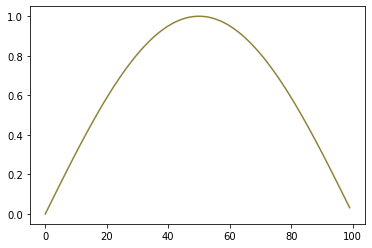

In [41]:
'''Exemples d'utilisation de packages standard (math) et externe (matplotlib.pyplot).
   syntaxe : nom_package.nom_méthode(paramètres)

'''

# Standard libray import
import math

# 3rd party import
import matplotlib.pyplot as plt

N = 100
x = list(range(N))
y = [math.sin(t*math.pi/N) for t in x]

plt.plot(x,y,c='#8F833A')
plt.show()

In [2]:
'''Example of nasty bug recasting of keyword package. Use keyword package name as variable name

'''

# Standard Library import
import keyword

for i, key_word in enumerate(keyword.kwlist): #Ho my gosh you recast keyword !!!
    print(f'{str(i).rjust(10)}: {key_word}')


list_my_keywords = ["if","None","trarmiz"]

for my_keyword in list_my_keywords:
    if keyword.iskeyword(my_keyword):
        print(f'YES, {my_keyword} is a keyword')

         0: False
         1: None
         2: True
         3: __peg_parser__
         4: and
         5: as
         6: assert
         7: async
         8: await
         9: break
        10: class
        11: continue
        12: def
        13: del
        14: elif
        15: else
        16: except
        17: finally
        18: for
        19: from
        20: global
        21: if
        22: import
        23: in
        24: is
        25: lambda
        26: nonlocal
        27: not
        28: or
        29: pass
        30: raise
        31: return
        32: try
        33: while
        34: with
        35: yield
YES, if is a keyword
YES, None is a keyword


<a id='project'></a>
# Étapes du développement d'un projet
- définir les objectifs et une architecture
- écritures de snippets
- rationalisation 
  - [refactoring](https://www.youtube.com/watch?v=D_6ybDcU5gc)
  - renommer les variables, éclater en fonctions, classes...
  - écriture de [docstring](https://www.python.org/dev/peps/pep-0257/) succints
  - création de packages
  - respect de la norme   [PEP8]( https://www.python.org/dev/peps/pep-0008/)
  - écrire un/des gui(s)
- documenter
  - [retravailler les docstrings](https://queirozf.com/entries/python-docstrings-reference-examples)
  - générer un document Spinx
  - diffuser sur [PyPI](https://pypi.org/)
    
## Pour en savoir plus
    - Ouvrage "Effective Python: 90 Specific Ways to Write Better Python (Brett Slatkin)"
    
[Retour au plan](#plan)

### Exemple de snippet

,A0,A1,A2
Hetna-XDH,-9.000000e-08,1.900000e-05,-0.04750
Hetna-DH,-3.000000e-08,-4.636244e-20,-0.03000
Q cells-XDH,-1.500000e-08,1.850000e-05,-0.05625
Q cells-DH,9.975029e-24,-1.500000e-05,-0.03500
Jinergy-XDH,-1.500000e-08,1.450000e-05,-0.01875
Jinergy-DH,2.500000e-09,-1.250000e-05,-0.01000


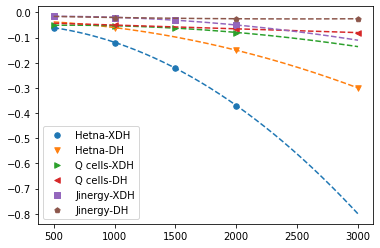

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


file = r'C:\Users\franc\PVcharacterization_files\essai_fit.xlsx'
df = pd.read_excel(file)
df.rename(columns={"Unnamed: 0":"titre0",
                   "Unnamed: 1":"titre1"},
         inplace=True)


titre1_corrige = []
list_titre = df['titre0'].tolist()
for i, titre in enumerate(list_titre): 
    if i%2 == 1:
        titre1_corrige.append(list_titre[i-1])
    else:
        titre1_corrige.append(list_titre[i])      
df['titre0'] = titre1_corrige

x = [float(y[0:-1]) for y in df.columns if 'h' in y]
x_fit = np.linspace(min(x),max(x),200)

marker = ["o", "v", ">", "<", "s", "p"]
dic_coef = {}
for index_row in df.index:
    label = df.iloc[index_row,0]+ '-' + df.iloc[index_row,1]
    y = df.iloc[index_row,[2,3,4,5,6,7]].tolist()
    
    x_for_fit = []
    y_for_fit = []
    for x1, y1, test in zip(x,y,np.isnan(y)):
        if not test:
            x_for_fit.append(x1)
            y_for_fit.append(y1)
    z = np.polyfit(x_for_fit, y_for_fit, 2)
    dic_coef[label] = z
    p = np.poly1d(z)
    plt.scatter(x,y,label=label,marker=marker[index_row],s=30)
    plt.plot(x_fit,p(x_fit),'--')
plt.legend()

df_coeff = pd.DataFrame(dic_coef).T
df_coeff.rename(columns={i:'A'+str(i) for i in range(len(df_coeff.columns))},
         inplace=True)
df_coeff.head(20)

### Exemple of rationalization of the snippet

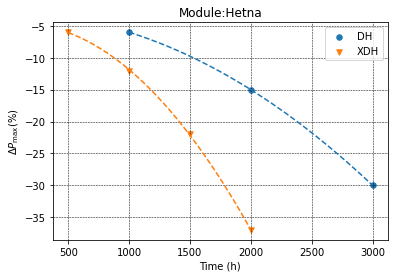

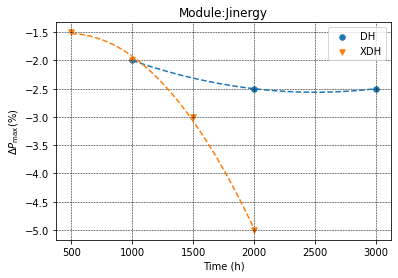

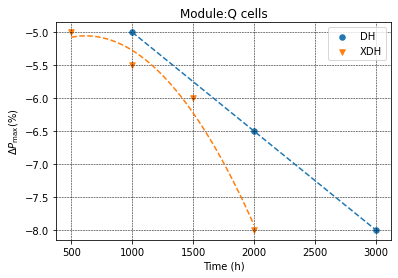

,A0,A1,A2
Hetna-DH,-3.000000e-06,1.970218e-17,-3.000
Hetna-XDH,-9.000000e-06,1.900000e-03,-4.750
Jinergy-DH,2.500000e-07,-1.250000e-03,-1.000
Jinergy-XDH,-1.500000e-06,1.450000e-03,-1.875
Q cells-DH,7.023240e-22,-1.500000e-03,-3.500
Q cells-XDH,-1.500000e-06,1.850000e-03,-5.625


In [8]:
# Standard Library imports
from itertools import groupby
from pathlib import Path

#3rd party import
import matplotlib.pyplot as plt
import pandas as pd

DEFAULT_DIR = Path.home()
ORDER = 2 # Polynomial order for the regession
marker = ["o", "v", ">", "<", "s", "p"] # List of marker for the scatter plot
Nfit = 200 # Number of points to plot the fitting polynomial
file = DEFAULT_DIR / Path('PVcharacterization_files/essai_fit.xlsx')

def read_and_clean(file):
    
    '''
    The read_and_clean function reads an .xlsx file organized as flow:

    ======= ===== ====== ====== =====  ===== ====== ======
                   500h  1000h  1500h  2000h  2500h 3000h
    Hetna   XDH    -6%    -12%   -22%  -37%     
            DH            -6%          -15%         -30%
    Q cells XDH    -5%    -5,50% -6%   -8%
            DH            -5%          -6,50%       -8%
    Jinergy XDH    -1,50% -2%    -3%   -5%
            DH            -2%          -2,50%       -2,50%
    ======= ===== ====== ====== =====  ===== ====== ======
    
    where the first colon is the module name, the second colon is the experiment name.
    
    The data are cleaned as follow:
    
    - the missing values of the column are filled as follow Hetna,Hetna,Qcell,Qcell,...
    - for each label Hetna-XDH, Hetna-DH,... the x_clean, y_clean lists are built by retaining
    only the (x_clean, y_clean) tuples where y_clean is not an nan.
    
    Args:
       file (Path): absolute na of the .xlsx file
       
    Returns:
       dic_values (list of tuples):(module,
                                    experiment,
                                    data_struct.x containing the x clean values
                                    data_struct.y containing the y clean values)
    
    Examples:
       [('Hetna', 'XDH',[500,1000,1500,2000],[-6,-12,-22,-37]),
        ('Hetna','DH',[1000,2000,3000],[-6,-15,-30]),
       ...]
                          
    '''
    
    # Standard library imports
    from collections import namedtuple
    
    # 3rd party imports
    import numpy as np
    import pandas as pd

    dic_values = {}
    data_struct = namedtuple("x_y", 
                             ["module",
                              "experiment",
                              "x",
                              "y",
                             ]
                             )
    
    df = pd.read_excel(file)
    df.rename(columns={"Unnamed: 0":"module",
                       "Unnamed: 1":"experiment"},inplace=True)

    # Takes care of missing values in the "module" column
    titre1_corrige = []
    list_titre = df['module'].tolist()
    for i, titre in enumerate(list_titre): 
        if isinstance(titre,float): # Convoluted check for missing value 
            titre1_corrige.append(list_titre[i-1])
        else:
            titre1_corrige.append(list_titre[i])      
    df['module'] = titre1_corrige
    
    
    # Takes care of nan y_i data value by skipping (x_i,y_i) tuples when y_i in nan
    x = [float(val_col[0:-1]) for val_col in df.columns if 'h' in val_col] # Built the time list
    list_tuples =[]
    for index_row in df.index:
        y = df.iloc[index_row,np.r_[2:len(df.columns)]].tolist()
        x_clean = []
        y_clean = []
        for x1, y1, test in zip(x,y,np.isnan(y)):
            if not test:
                x_clean.append(x1)
                y_clean.append(y1*100) # Takes care of the casting to real value of -dd.dd% excel format

        module, experiment = df.iloc[index_row,0], df.iloc[index_row,1]
        list_tuples.append(data_struct(module, experiment,x_clean,y_clean))
    
    return list_tuples

def fit_curve(x,y,dic_coef,label):
    
    '''
    The function fit_curve fit the set of tuples (x_i,y_i) by a polynom of order ORDER.
    
    Args:
       x (ndarray): list of absissa
       y (ndarray): list of ordinate
       dic_coef (dict): dict kayed by label of the fitting coefficients (use mutability)
       
    Returns:
       (x_fit,y_fit) (tuple of ndarrays): x_fit list of the Nfit fitting absissa
                                          x_fit list of the Nfit fitting ordinate
       
    '''
    
    # 3rd party imports
    import numpy as np
    
    assert len(x)>= ORDER+1, f'Cannot fit {len(x)} with a polynomial of order {ORDER}'
    
    x_fit = np.linspace(min(x),max(x),Nfit)
    z = np.polyfit(x, y, ORDER)
    dic_coef[label] = z
    p = np.poly1d(z)
    y_fit = p(x_fit)
    return (x_fit,y_fit)


list_tuples = read_and_clean(file)

dic_coef = {} # Contains the fitting coefficients keyed by <module>-<experiment>

for module, data_tuple in groupby(sorted(list_tuples), lambda t: t[0]): # group experiments per module
    for index, data in enumerate(list(data_tuple)): 
        x,y = data.x,data.y
        x_fit,y_fit = fit_curve(x,y,dic_coef,module+'-'+data.experiment)
        plt.scatter(x, y, label=data.experiment, marker=marker[index],s=30)
        plt.plot(x_fit,y_fit,'--')
        plt.grid(color='k', linestyle='--', linewidth=0.5)
        plt.xlabel('Time (h)')
        plt.ylabel('$\Delta {P_{\max }}(\% )$')
        plt.legend()
    plt.title(f'Module:{module}')
    plt.show()


df_coeff = pd.DataFrame(dic_coef).T
df_coeff.rename(columns={i:'A'+str(i) for i in range(len(df_coeff.columns))},inplace=True)
df_coeff.head(20)

<a id='jupyter'></a>
## Learn Jupyter
[Ipython and Jupyter in DEpth](https://www.youtube.com/watch?v=hgiNlxUN2V0)

[Retour au plan](#plan)


<a id='time'></a>
## Working with time
you can see
   - [working with date python](https://www.youtube.com/watch?v=eirjjyP2qcQ&t=1426s) 
   - [Python official doc on datetime](https://docs.python.org/3/library/datetime.html#module-datetime)

[Retour au plan](#plan)

In [31]:
from datetime import datetime, timedelta
from pytz import timezone
import pytz

tz = pytz.timezone('Europe/Paris')

now = datetime.now()
now = tz.localize(now)

# Print datetime formatting
print(now.isoformat())
print(now.strftime('%Y-%m-%d'))
print(now.strftime('%B %d, %Y %H:%M'))

date = 'July 14, 2022'
time = datetime.strptime(date,'%B %d, %Y')

# Builds a list of datetimes
start = datetime.strptime('July 28, 2021','%B %d, %Y')
end = datetime.strptime('September 5, 2021','%B %d, %Y')
days = [start + timedelta(days=x+1) for x in range(0, (end-start).days)]
for day in days:
    print(day.strftime('%Y-%m-%d'))

2021-12-08T15:15:04.022842+01:00
2021-12-08
December 08, 2021 15:15
2021-07-29
2021-07-30
2021-07-31
2021-08-01
2021-08-02
2021-08-03
2021-08-04
2021-08-05
2021-08-06
2021-08-07
2021-08-08
2021-08-09
2021-08-10
2021-08-11
2021-08-12
2021-08-13
2021-08-14
2021-08-15
2021-08-16
2021-08-17
2021-08-18
2021-08-19
2021-08-20
2021-08-21
2021-08-22
2021-08-23
2021-08-24
2021-08-25
2021-08-26
2021-08-27
2021-08-28
2021-08-29
2021-08-30
2021-08-31
2021-09-01
2021-09-02
2021-09-03
2021-09-04
2021-09-05


In [4]:
'''List of timezones

'''

for tz in pytz.all_timezones:
    print(tz,end=' ;')

Africa/Abidjan ;Africa/Accra ;Africa/Addis_Ababa ;Africa/Algiers ;Africa/Asmara ;Africa/Asmera ;Africa/Bamako ;Africa/Bangui ;Africa/Banjul ;Africa/Bissau ;Africa/Blantyre ;Africa/Brazzaville ;Africa/Bujumbura ;Africa/Cairo ;Africa/Casablanca ;Africa/Ceuta ;Africa/Conakry ;Africa/Dakar ;Africa/Dar_es_Salaam ;Africa/Djibouti ;Africa/Douala ;Africa/El_Aaiun ;Africa/Freetown ;Africa/Gaborone ;Africa/Harare ;Africa/Johannesburg ;Africa/Juba ;Africa/Kampala ;Africa/Khartoum ;Africa/Kigali ;Africa/Kinshasa ;Africa/Lagos ;Africa/Libreville ;Africa/Lome ;Africa/Luanda ;Africa/Lubumbashi ;Africa/Lusaka ;Africa/Malabo ;Africa/Maputo ;Africa/Maseru ;Africa/Mbabane ;Africa/Mogadishu ;Africa/Monrovia ;Africa/Nairobi ;Africa/Ndjamena ;Africa/Niamey ;Africa/Nouakchott ;Africa/Ouagadougou ;Africa/Porto-Novo ;Africa/Sao_Tome ;Africa/Timbuktu ;Africa/Tripoli ;Africa/Tunis ;Africa/Windhoek ;America/Adak ;America/Anchorage ;America/Anguilla ;America/Antigua ;America/Araguaina ;America/Argentina/Buenos_Air